In [66]:
import numpy as np
import pandas as pd
import os
import itertools
##import os
import re
%matplotlib inline
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.corpus import words
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

In [67]:
data=pd.read_csv('C:/Users/CEPL/Downloads/bbc-text.csv')

In [68]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [69]:
data.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [70]:
def sentence_cleaning(sentence):
    sentence = re.sub("\'d", " would", sentence)
    sentence = re.sub("\'ll", " will", sentence)
    sentence = re.sub("\'ve", " have", sentence)
    sentence = re.sub("\'s", "", sentence)
    sentence = re.sub("n\'t", " not", sentence)              
    sentence = re.sub("won't", "will not", sentence)
    sentence = re.sub("can't", "can not", sentence)
    sentence = re.sub("ain't", "am not", sentence)
    sentence=re.sub('[^A-Za-z ]', ' ', sentence)
    sentence=re.sub(' +', ' ',sentence)
    sentence=sentence.lower()
    return sentence


def data_cleaning(data):
    data['Cleaned']=None
    for index, row in data.iterrows():
        data.loc[index,'Cleaned']=sentence_cleaning(row["text"])
    print('Done')
    return data

In [71]:
data=data.reset_index(drop=True)
data=data_cleaning(data)

Done


In [73]:
data.loc[620,'text']

'israel looks to us for bank chief israel has asked a us banker and former international monetary fund director to run its central bank.  stanley fischer  vice chairman of banking giant citigroup  has agreed to take the bank of israel job subject to approval from parliament and cabinet. his nomination by prime minister ariel sharon came as a surprise  and led to gains on the tel aviv stock market. mr fischer  who speaks fluent hebrew  will have to become an israeli citizen to take the job. the us says he will not have to give up us citizenship to do so.  previous incumbent david klein  who often argued with the finance ministry  steps down on 16 january. mr fischer will face a delicate balancing act - both in political and economic terms - between mr sharon and finance minister binyamin netanyahu  who also backed his nomination. but his appointment has also raised hopes that it could bring in fresh investment - and perhaps even an improvement in the country s credit rating mr fischer f

In [74]:
data.loc[620,'Cleaned']

'israel looks to us for bank chief israel has asked a us banker and former international monetary fund director to run its central bank stanley fischer vice chairman of banking giant citigroup has agreed to take the bank of israel job subject to approval from parliament and cabinet his nomination by prime minister ariel sharon came as a surprise and led to gains on the tel aviv stock market mr fischer who speaks fluent hebrew will have to become an israeli citizen to take the job the us says he will not have to give up us citizenship to do so previous incumbent david klein who often argued with the finance ministry steps down on january mr fischer will face a delicate balancing act both in political and economic terms between mr sharon and finance minister binyamin netanyahu who also backed his nomination but his appointment has also raised hopes that it could bring in fresh investment and perhaps even an improvement in the country s credit rating mr fischer first went to israel for si

In [75]:
stop = stopwords.words('english')
ps = WordNetLemmatizer()

In [76]:
def cleaning(data):
    data['cleaned_with_lemma']=None
    words=[]
    for index, row in data.iterrows(): 
        words=[]
        sentence=row["Cleaned"].split()
        for word in sentence:
            if word not in stop:
                words.append(ps.lemmatize(word))
        sentence=' '.join(words)
        data.loc[index,'cleaned_with_lemma']=sentence
    print('Done')
    return data

In [77]:
data=cleaning(data)

Done


C:\Users\CEPL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


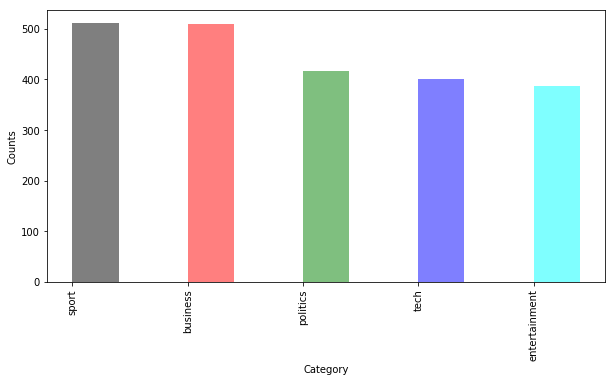

In [81]:
abc= data.groupby('category')['category'].agg({'counts':'count'})
abc = abc.sort_values(['counts'],ascending=False)
plt.rcParams["figure.figsize"] = (10,5)
y_pos = np.arange(len(abc.index))
counts = abc['counts'].tolist()
plt.bar(y_pos, counts,align='edge', width=0.4, alpha=0.5,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(y_pos, abc.index,rotation=90,fontsize=10)
plt.ylabel('Counts')
plt.xlabel('Category')
plt.show()

In [84]:
from collections import defaultdict
import seaborn as sns
def extract_dictionary_paddle(cls_text, column_name):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row[column_name].split():
            dictionary[word] +=1
    return dictionary

In [89]:
data.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

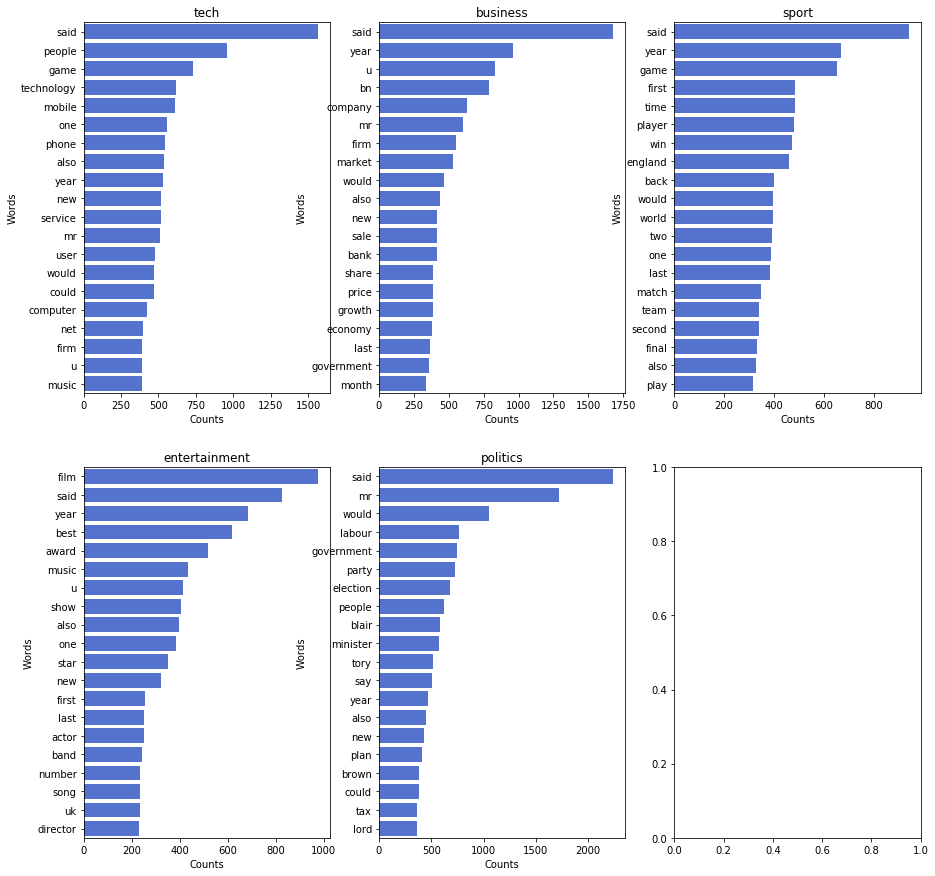

In [91]:
dict_list = []                                               
for i in ['tech', 'business', 'sport', 'entertainment', 'politics']:
    cls_text = data[data['category']==i]                
    dict_list.append(extract_dictionary_paddle(cls_text, 'cleaned_with_lemma'))
    
a=['tech', 'business', 'sport', 'entertainment', 'politics']
fix, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 15))

for i in range(2):
    for j in range(3):
        if i*3+j != 5:
            temp = pd.DataFrame(list(dict_list[(i*3+j)].items()), columns = ['Words', 'Counts'])
            sorted_words = temp.sort_values('Counts', ascending = False)
            sorted_words_top = sorted_words[:20]
            sns.barplot(x="Counts", y="Words", data=sorted_words_top, color='royalblue', ax=axs[i][j]).set_title(a[i*3+j])

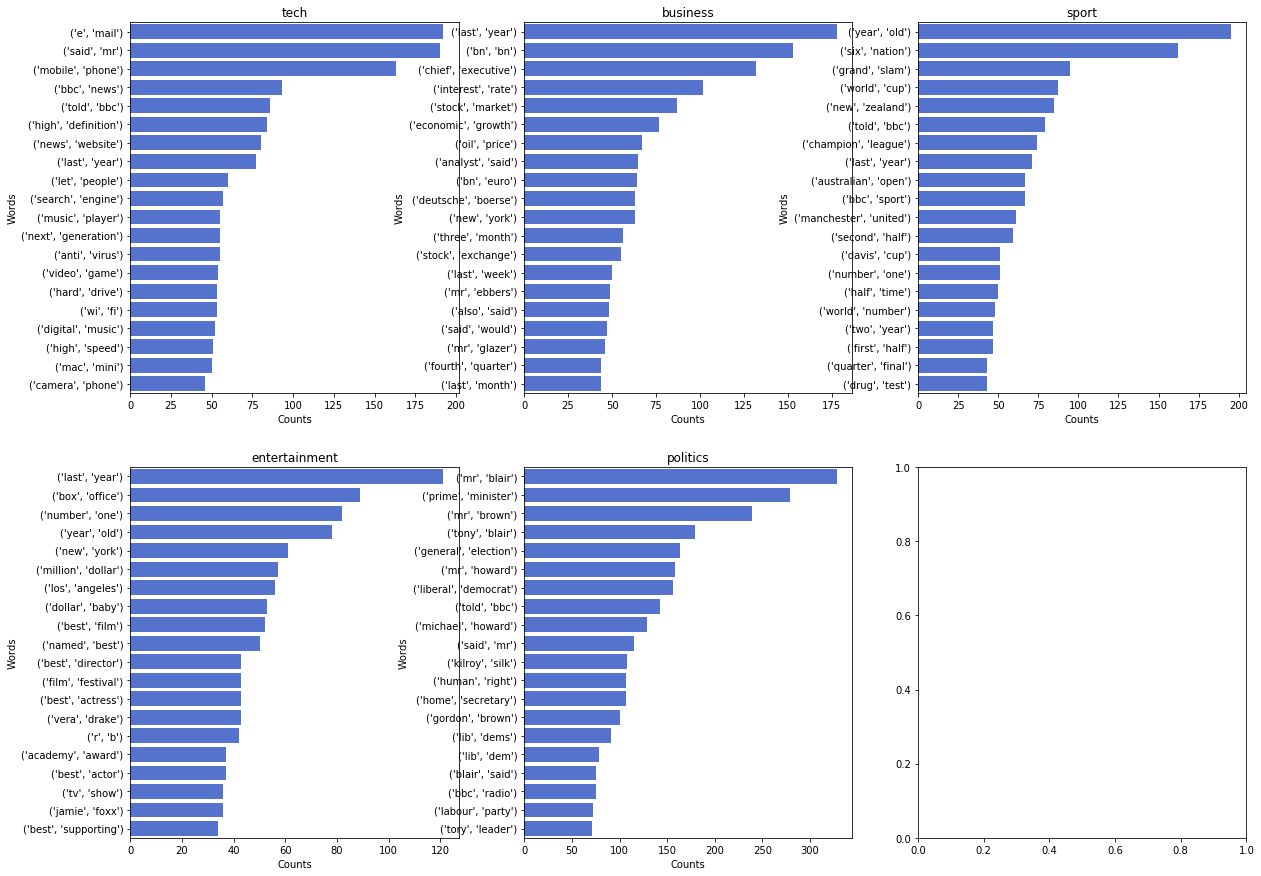

In [94]:
import nltk
fix, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 15))

for i in range(2):
    for j in range(3):
        if i*3+j != 5:
            temp_data = data[data['category']==a[i*3+j]]
            corpus = ''
            for index, row in temp_data.iterrows():
                corpus = corpus + row['cleaned_with_lemma']
                
            tokens = nltk.word_tokenize(corpus)
            bgs = nltk.bigrams(tokens)
            bigram_dict = {}
            fdist = nltk.FreqDist(bgs)
            for k,v in fdist.items():
                bigram_dict[k] = v
                
            temp = pd.DataFrame(list(bigram_dict.items()), columns = ['Words', 'Counts'])
            sorted_words = temp.sort_values('Counts', ascending = False)
            sorted_words_top = sorted_words[0:20]
            sns.barplot(x="Counts", y="Words", data=sorted_words_top, color='royalblue', ax=axs[i][j]).set_title(a[i*3+j])

In [97]:
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer#bow
from sklearn.feature_extraction.text import TfidfVectorizer#Tfidf

In [99]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
classes = le.fit_transform(data['category'])

data['class'] = classes

In [100]:
le.classes_

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

### Train - Test Split

In [102]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'class'], data[['class']],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=data[['class']])

In [103]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = le.classes_#[0,1,2,3,4]
    
    
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(15,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [104]:
def tuning(model, parameters, parameter_name, train_data_x, train_data_y, plot_values):
    grid = GridSearchCV(model, parameters, cv = 3, scoring = 'f1_macro')
    grid.fit(train_data_x, train_data_y)
    
    
    results = pd.DataFrame(grid.cv_results_)           #storing results of gridseachcv in a dataframe to access its elements
    params = results['params']                         #storing combination of parameters used by model in params
    score_tr_array = results['mean_train_score']         #storing scores on train data of model
    score_cv_array = results['mean_test_score']          #storing scores on cv data of model
    for i in range(len(params)):
        print("For", params[i]," acc of Train data is", score_tr_array[i],"and acc of CV data is", score_cv_array[i])
    
    
    print('Best Parameter is ',  grid.best_params_)
    print('Best F1 Score is ',  grid.best_score_)
    plt.xlabel(parameter_name)
    plt.title('Cross Validation')
    plt.plot(np.log10(plot_values),grid.cv_results_['mean_train_score'])
    plt.plot(np.log10(plot_values),grid.cv_results_['mean_test_score'])
    plt.legend(['Train Accuracy', 'CV Accuracy'])
    plt.show()
    
    return grid.best_params_

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss, roc_auc_score, classification_report

from collections import Counter, defaultdict


## Naive Bayes

### Naive Bayes using BOW(uni gram)

For {'alpha': 1e-05}  acc of Train data is 0.9997274125575076 and acc of CV data is 0.9630829714450165
For {'alpha': 0.0001}  acc of Train data is 0.9997274125575076 and acc of CV data is 0.9666179977280852
For {'alpha': 0.001}  acc of Train data is 0.9997274125575076 and acc of CV data is 0.968264268417127
For {'alpha': 0.01}  acc of Train data is 0.999454825115015 and acc of CV data is 0.9688595086160009
For {'alpha': 0.1}  acc of Train data is 0.9980025609796322 and acc of CV data is 0.971015327702392
For {'alpha': 1}  acc of Train data is 0.9944370813146151 and acc of CV data is 0.9703642973717165
For {'alpha': 10}  acc of Train data is 0.9757866965644849 and acc of CV data is 0.9483745999602099
For {'alpha': 100}  acc of Train data is 0.9331759144366908 and acc of CV data is 0.9060544260207269
For {'alpha': 1000}  acc of Train data is 0.8881276473737008 and acc of CV data is 0.863287135291996
For {'alpha': 10000}  acc of Train data is 0.814349041659018 and acc of CV data is 0.7913

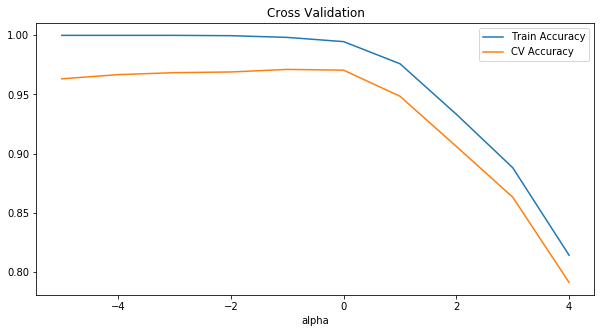

Accuracy of model on testing data is 0.9797752808988764
F1 Score of model on testing data is 0.9800375744354373
Log loss of model on testing data is 0.480212379467507


In [109]:
vectorizer = CountVectorizer()
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])


model = MultinomialNB()
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = {'alpha' : alpha}
best_params = tuning(model, alphas, 'alpha', train_vec, y_train, alpha)

best_alpha = best_params['alpha']
clf = MultinomialNB(alpha = best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


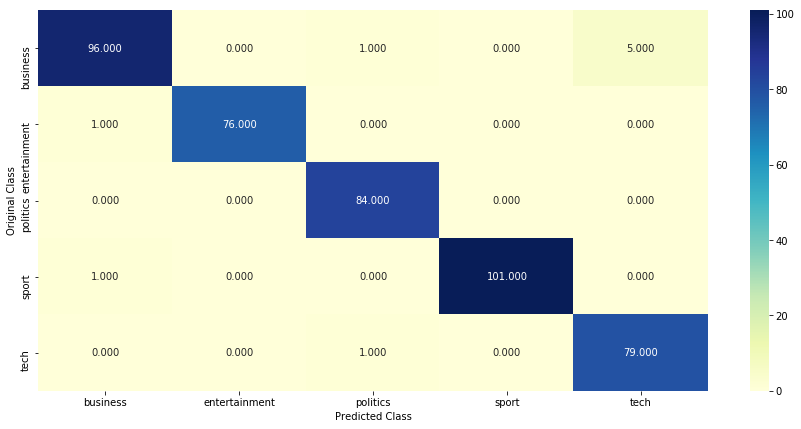

In [110]:
plot_confusion_matrix(y_test, y_pred)

### Naive Bayes using BOW(Bi-Gram)

For {'alpha': 1e-05}  acc of Train data is 1.0 and acc of CV data is 0.9745315609871008
For {'alpha': 0.0001}  acc of Train data is 1.0 and acc of CV data is 0.9758661789423536
For {'alpha': 0.001}  acc of Train data is 1.0 and acc of CV data is 0.9758671203088747
For {'alpha': 0.01}  acc of Train data is 1.0 and acc of CV data is 0.9782231429803195
For {'alpha': 0.1}  acc of Train data is 1.0 and acc of CV data is 0.9781115370419671
For {'alpha': 1}  acc of Train data is 0.9997274125575076 and acc of CV data is 0.9723493675426167
For {'alpha': 10}  acc of Train data is 0.9866347389628222 and acc of CV data is 0.9422786364304773
For {'alpha': 100}  acc of Train data is 0.9481499149707043 and acc of CV data is 0.9068340043511339
For {'alpha': 1000}  acc of Train data is 0.9006196253795067 and acc of CV data is 0.8650930891730197
For {'alpha': 10000}  acc of Train data is 0.8313520676467682 and acc of CV data is 0.8003169567297378
Best Parameter is  {'alpha': 0.01}
Best F1 Score is  0.97

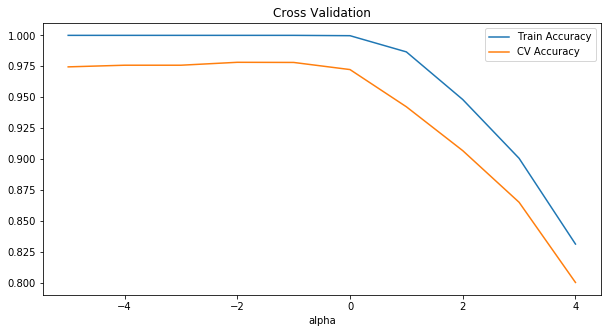

Accuracy of model on testing data is 0.9775280898876404
F1 Score of model on testing data is 0.9774504619649381
Log loss of model on testing data is 0.7041425582263081


In [113]:
vectorizer = CountVectorizer(ngram_range = (1, 2))
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])


model = MultinomialNB()
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = {'alpha' : alpha}
best_params = tuning(model, alphas, 'alpha', train_vec, y_train, alpha)

best_alpha = best_params['alpha']
clf = MultinomialNB(alpha = best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


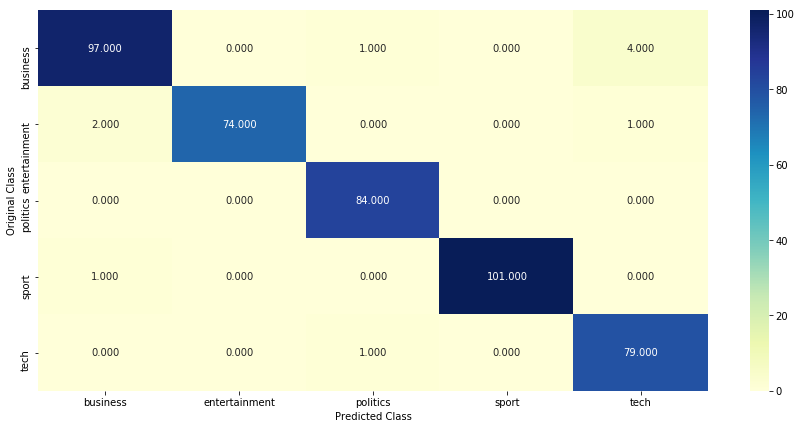

In [114]:
plot_confusion_matrix(y_test, y_pred)

### Naive Bayes using TFIDF(unigram)

For {'alpha': 1e-05}  acc of Train data is 1.0 and acc of CV data is 0.9564507725088228
For {'alpha': 0.0001}  acc of Train data is 1.0 and acc of CV data is 0.9625930289194489
For {'alpha': 0.001}  acc of Train data is 0.9997274125575076 and acc of CV data is 0.9660300225084285
For {'alpha': 0.01}  acc of Train data is 0.9997274125575076 and acc of CV data is 0.9705965389991543
For {'alpha': 0.1}  acc of Train data is 0.997946339174885 and acc of CV data is 0.9687087017081896
For {'alpha': 1}  acc of Train data is 0.989748594388538 and acc of CV data is 0.9632734581726262
For {'alpha': 10}  acc of Train data is 0.9199891537201218 and acc of CV data is 0.855418294727936
For {'alpha': 100}  acc of Train data is 0.25793158355014517 and acc of CV data is 0.2555269541890194
For {'alpha': 1000}  acc of Train data is 0.2669978439400286 and acc of CV data is 0.25898110241999034
For {'alpha': 10000}  acc of Train data is 0.13544707544952408 and acc of CV data is 0.13538418825309073
Best Parame

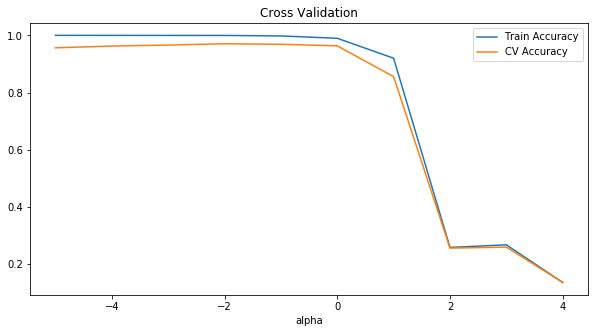

Accuracy of model on testing data is 0.9842696629213483
F1 Score of model on testing data is 0.9844485934454174
Log loss of model on testing data is 0.07325114686984047


In [111]:
vectorizer = TfidfVectorizer()
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])


model = MultinomialNB()
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = {'alpha' : alpha}
best_params = tuning(model, alphas, 'alpha', train_vec, y_train, alpha)

best_alpha = best_params['alpha']
clf = MultinomialNB(alpha = best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_tfidf_sw_acc = accuracy_score(y_test, y_pred)
nb_uni_tfidf_sw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_tfidf_sw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_tfidf_sw_acc)
print('F1 Score of model on testing data is', nb_uni_tfidf_sw_f1)
print('Log loss of model on testing data is', nb_uni_tfidf_sw_ll)

-------------------- Confusion matrix --------------------


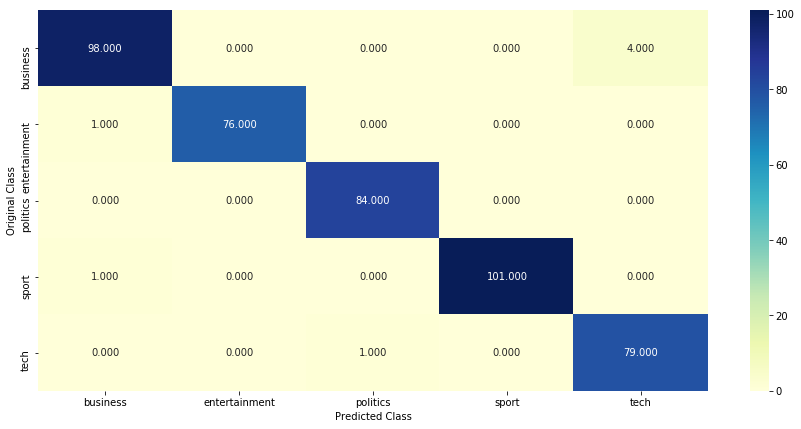

In [112]:
plot_confusion_matrix(y_test, y_pred)

### Naive Bayes using TFIDF(Bi-Gram)

For {'alpha': 1e-05}  acc of Train data is 1.0 and acc of CV data is 0.974080157187948
For {'alpha': 0.0001}  acc of Train data is 1.0 and acc of CV data is 0.9758384297164064
For {'alpha': 0.001}  acc of Train data is 1.0 and acc of CV data is 0.9746336563487388
For {'alpha': 0.01}  acc of Train data is 1.0 and acc of CV data is 0.9780428999750602
For {'alpha': 0.1}  acc of Train data is 1.0 and acc of CV data is 0.9720684134480494
For {'alpha': 1}  acc of Train data is 0.998533404901433 and acc of CV data is 0.952159984122512
For {'alpha': 10}  acc of Train data is 0.8338798774432133 and acc of CV data is 0.7049222946625672
For {'alpha': 100}  acc of Train data is 0.253612558681329 and acc of CV data is 0.2532657013331462
For {'alpha': 1000}  acc of Train data is 0.25188329140739313 and acc of CV data is 0.22854042968406413
For {'alpha': 10000}  acc of Train data is 0.1356239561650227 and acc of CV data is 0.1354397348392515
Best Parameter is  {'alpha': 0.01}
Best F1 Score is  0.9780

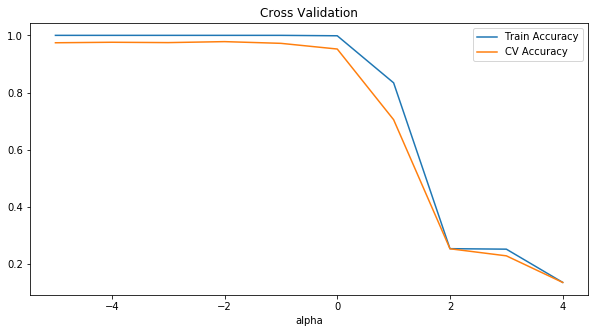

Accuracy of model on testing data is 0.9775280898876404
F1 Score of model on testing data is 0.9774504619649381
Log loss of model on testing data is 0.08037930241698936


In [115]:
vectorizer = TfidfVectorizer(ngram_range = (1, 2))
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])


model = MultinomialNB()
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = {'alpha' : alpha}
best_params = tuning(model, alphas, 'alpha', train_vec, y_train, alpha)

best_alpha = best_params['alpha']
clf = MultinomialNB(alpha = best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_tfidf_sw_acc = accuracy_score(y_test, y_pred)
nb_uni_tfidf_sw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_tfidf_sw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_tfidf_sw_acc)
print('F1 Score of model on testing data is', nb_uni_tfidf_sw_f1)
print('Log loss of model on testing data is', nb_uni_tfidf_sw_ll)

-------------------- Confusion matrix --------------------


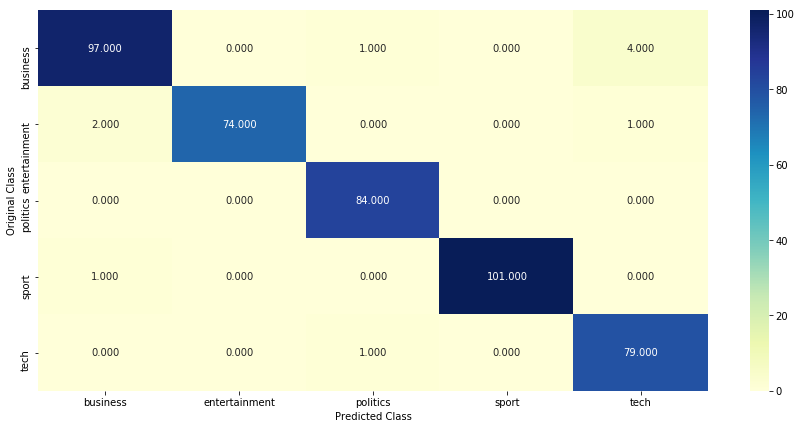

In [116]:
plot_confusion_matrix(y_test, y_pred)

## Logistic Regression

### Logistic regression using BOW(uni gram)

For {'C': 1e-05}  acc of Train data is 0.8714578434061101 and acc of CV data is 0.8502927338328263
For {'C': 0.0001}  acc of Train data is 0.934037888591584 and acc of CV data is 0.9111604903350556
For {'C': 0.001}  acc of Train data is 0.9805295214978237 and acc of CV data is 0.9572995462276213
For {'C': 0.01}  acc of Train data is 0.999454825115015 and acc of CV data is 0.9680760916080756
For {'C': 0.1}  acc of Train data is 1.0 and acc of CV data is 0.9678853172870238
For {'C': 1}  acc of Train data is 1.0 and acc of CV data is 0.965984412106117
For {'C': 10}  acc of Train data is 1.0 and acc of CV data is 0.9648646567489995
For {'C': 100}  acc of Train data is 1.0 and acc of CV data is 0.9619507625929272
For {'C': 1000}  acc of Train data is 1.0 and acc of CV data is 0.9666701505506532
For {'C': 10000}  acc of Train data is 1.0 and acc of CV data is 0.9666701505506532
Best Parameter is  {'C': 0.01}
Best F1 Score is  0.9680760916080756


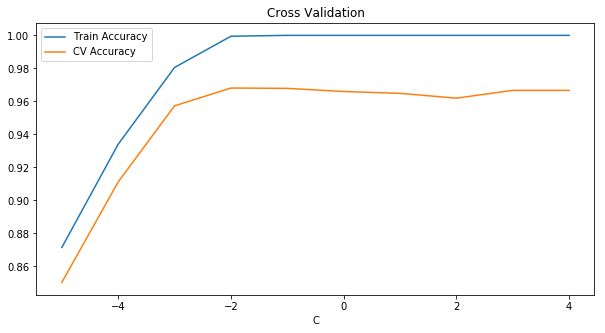

Accuracy of model on testing data is 0.9752808988764045
F1 Score of model on testing data is 0.9756736502743266
Log loss of model on testing data is 0.24080022712170024


In [121]:
from sklearn.linear_model import LogisticRegression
vectorizer = CountVectorizer()
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])


model = LogisticRegression(multi_class='ovr')
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = {'C' : alpha}
best_params = tuning(model, alphas, 'C', train_vec, y_train, alpha)

best_alpha = best_params['C']
clf = LogisticRegression(multi_class='ovr',C = best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


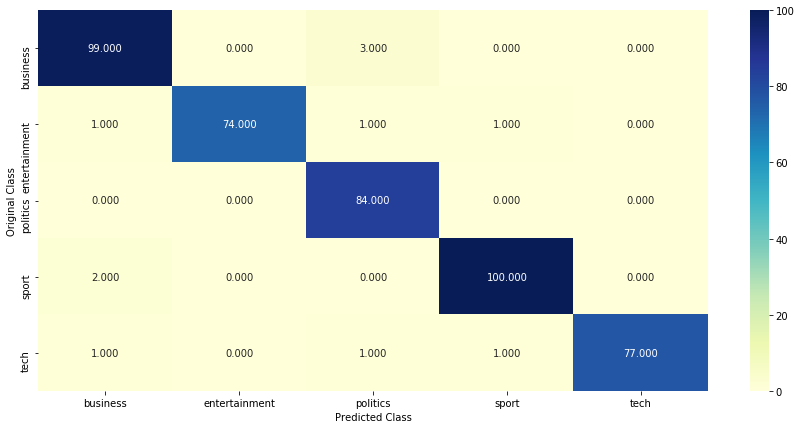

In [122]:
plot_confusion_matrix(y_test, y_pred)

### Logistic regression using BOW(Bi-Gram)

For {'C': 1e-05}  acc of Train data is 0.8907287655035138 and acc of CV data is 0.8563278300940128
For {'C': 0.0001}  acc of Train data is 0.9475632066366239 and acc of CV data is 0.9181123039850935
For {'C': 0.001}  acc of Train data is 0.9877051765035948 and acc of CV data is 0.9595169285545531
For {'C': 0.01}  acc of Train data is 1.0 and acc of CV data is 0.9692358697497624
For {'C': 0.1}  acc of Train data is 1.0 and acc of CV data is 0.96880343636784
For {'C': 1}  acc of Train data is 1.0 and acc of CV data is 0.9682862609383397
For {'C': 10}  acc of Train data is 1.0 and acc of CV data is 0.9665189528082713
For {'C': 100}  acc of Train data is 1.0 and acc of CV data is 0.9654236569851962
For {'C': 1000}  acc of Train data is 1.0 and acc of CV data is 0.9638827386214598
For {'C': 10000}  acc of Train data is 1.0 and acc of CV data is 0.9644340813036749
Best Parameter is  {'C': 0.01}
Best F1 Score is  0.9692358697497624


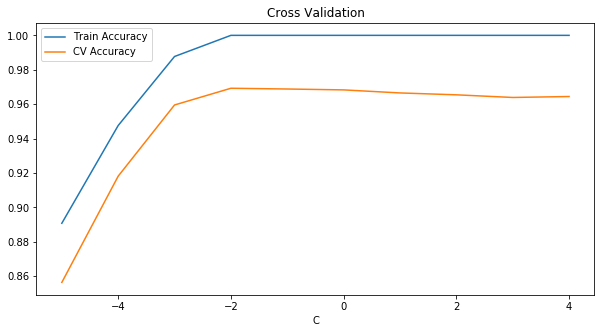

Accuracy of model on testing data is 0.9752808988764045
F1 Score of model on testing data is 0.9756736502743266
Log loss of model on testing data is 0.23970171005204216


In [123]:
vectorizer = CountVectorizer(ngram_range = (1, 2))
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])


model = LogisticRegression(multi_class='ovr')
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = {'C' : alpha}
best_params = tuning(model, alphas, 'C', train_vec, y_train, alpha)

best_alpha = best_params['C']
clf = LogisticRegression(multi_class='ovr',C = best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


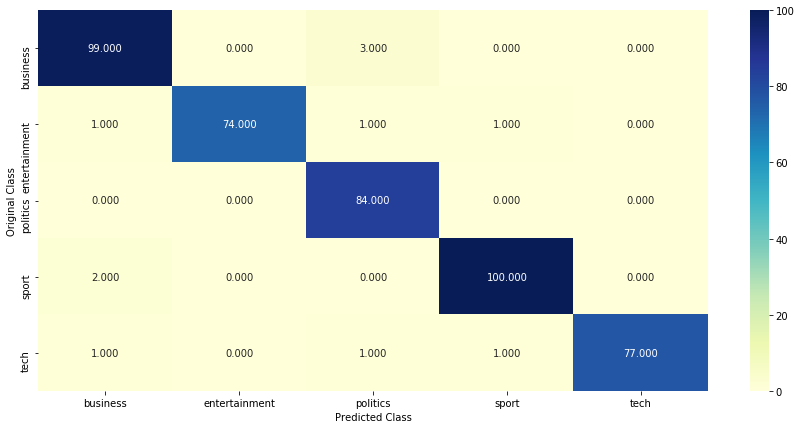

In [124]:
plot_confusion_matrix(y_test, y_pred)

### Logistic Regression using TFIDF(uni gram)

For {'C': 1e-05}  acc of Train data is 0.2533301892351451 and acc of CV data is 0.25294752067374304
For {'C': 0.0001}  acc of Train data is 0.25328743563776396 and acc of CV data is 0.2528939672841072
For {'C': 0.001}  acc of Train data is 0.2526890697257809 and acc of CV data is 0.2523246607319274
For {'C': 0.01}  acc of Train data is 0.3101342167207734 and acc of CV data is 0.2965883175705228
For {'C': 0.1}  acc of Train data is 0.929661079406929 and acc of CV data is 0.8757832901816469
For {'C': 1}  acc of Train data is 0.9956560590754385 and acc of CV data is 0.9674567729409219
For {'C': 10}  acc of Train data is 1.0 and acc of CV data is 0.972419542497243
For {'C': 100}  acc of Train data is 1.0 and acc of CV data is 0.9723423154955166
For {'C': 1000}  acc of Train data is 1.0 and acc of CV data is 0.972887812229115
For {'C': 10000}  acc of Train data is 1.0 and acc of CV data is 0.9717871055051045
Best Parameter is  {'C': 1000}
Best F1 Score is  0.972887812229115


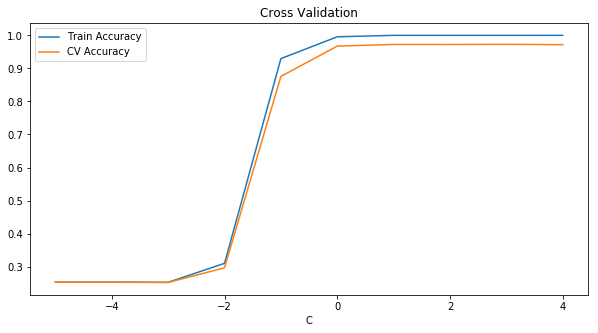

Accuracy of model on testing data is 0.9820224719101124
F1 Score of model on testing data is 0.9819234354458131
Log loss of model on testing data is 0.04937538886644758


In [128]:
vectorizer = TfidfVectorizer()
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])


model = LogisticRegression(multi_class='ovr')
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = {'C' : alpha}
best_params = tuning(model, alphas, 'C', train_vec, y_train, alpha)

best_alpha = best_params['C']
clf = LogisticRegression(multi_class='ovr',C = best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


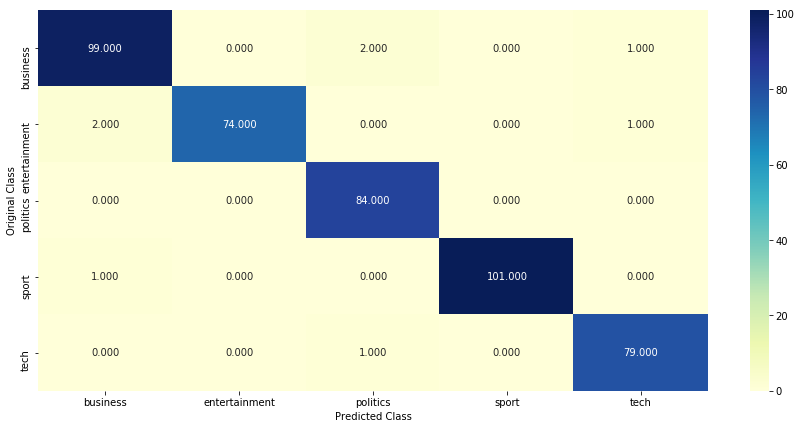

In [129]:
plot_confusion_matrix(y_test, y_pred)

### Logistic Regression using TFIDF(Bi gram)

For {'C': 1e-05}  acc of Train data is 0.2586321124806857 and acc of CV data is 0.2562935280718255
For {'C': 0.0001}  acc of Train data is 0.2580896719441829 and acc of CV data is 0.2559048313227218
For {'C': 0.001}  acc of Train data is 0.255492004145312 and acc of CV data is 0.2533555445659397
For {'C': 0.01}  acc of Train data is 0.252149491242858 and acc of CV data is 0.2516818589659388
For {'C': 0.1}  acc of Train data is 0.8411027956343934 and acc of CV data is 0.7189579414591435
For {'C': 1}  acc of Train data is 0.9988197280642469 and acc of CV data is 0.9565026052192589
For {'C': 10}  acc of Train data is 1.0 and acc of CV data is 0.9707951805177178
For {'C': 100}  acc of Train data is 1.0 and acc of CV data is 0.9736100930615055
For {'C': 1000}  acc of Train data is 1.0 and acc of CV data is 0.9736048337663126
For {'C': 10000}  acc of Train data is 1.0 and acc of CV data is 0.9730566838236399
Best Parameter is  {'C': 100}
Best F1 Score is  0.9736100930615055


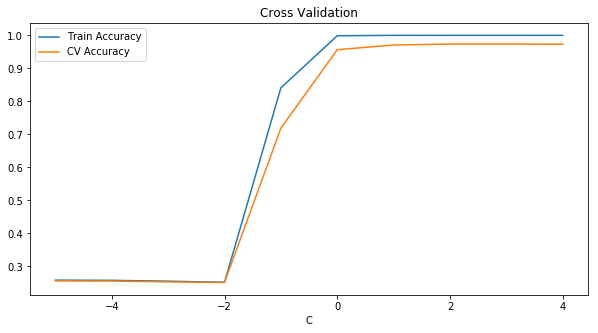

Accuracy of model on testing data is 0.9797752808988764
F1 Score of model on testing data is 0.9796976731324476
Log loss of model on testing data is 0.07200276267020234


In [126]:
vectorizer = TfidfVectorizer(ngram_range = (1, 2))
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])


model = LogisticRegression(multi_class='ovr')
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = {'C' : alpha}
best_params = tuning(model, alphas, 'C', train_vec, y_train, alpha)

best_alpha = best_params['C']
clf = LogisticRegression(multi_class='ovr',C = best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


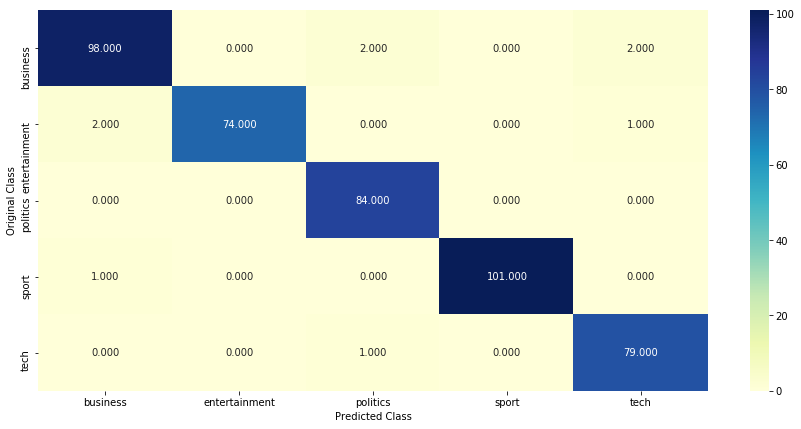

In [127]:
plot_confusion_matrix(y_test, y_pred)

## Support Vector Machines

### SVM using BOW(uni gram)

For {'C': 1e-05}  acc of Train data is 0.10172273023300162 and acc of CV data is 0.10518968872800111
For {'C': 0.0001}  acc of Train data is 0.6497937518096334 and acc of CV data is 0.6165244533062181
For {'C': 0.001}  acc of Train data is 0.9863428457857465 and acc of CV data is 0.9477800972912028
For {'C': 0.01}  acc of Train data is 1.0 and acc of CV data is 0.9630377908406391
For {'C': 0.1}  acc of Train data is 1.0 and acc of CV data is 0.9641429771838557
For {'C': 1}  acc of Train data is 1.0 and acc of CV data is 0.9641429771838557
For {'C': 10}  acc of Train data is 1.0 and acc of CV data is 0.9641429771838557
For {'C': 100}  acc of Train data is 1.0 and acc of CV data is 0.9641429771838557
For {'C': 1000}  acc of Train data is 1.0 and acc of CV data is 0.9641429771838557
For {'C': 10000}  acc of Train data is 1.0 and acc of CV data is 0.9641429771838557
Best Parameter is  {'C': 0.1}
Best F1 Score is  0.9641429771838557


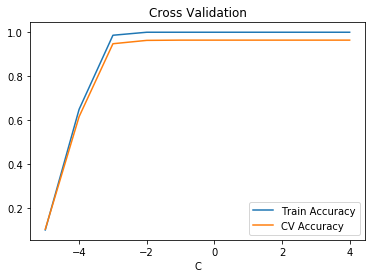

Accuracy of model on testing data is 0.9797752808988764
F1 Score of model on testing data is 0.9795117462703298
Log loss of model on testing data is 0.06984731219273269


In [205]:
from sklearn.svm import SVC

vectorizer = CountVectorizer()
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])

model = SVC(decision_function_shape='ovo', kernel='linear')
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = {'C' : alpha}
best_params = tuning(model, alphas, 'C', train_vec, y_train, alpha)

best_alpha = best_params['C']
clf = SVC(decision_function_shape='ovo', kernel='linear',C = best_alpha,probability=True).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


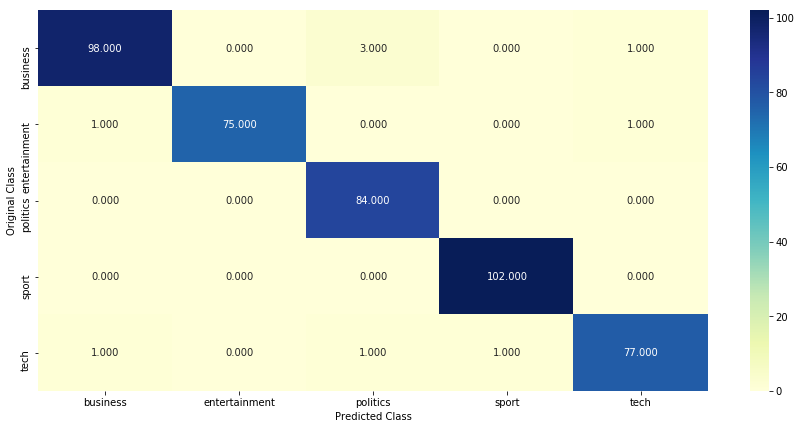

In [206]:
plot_confusion_matrix(y_test, y_pred)

### SVM using BOW(Bi gram)

For {'C': 1e-05}  acc of Train data is 0.10370846979305069 and acc of CV data is 0.10580809784846952
For {'C': 0.0001}  acc of Train data is 0.6756630318880532 and acc of CV data is 0.6304372537975649
For {'C': 0.001}  acc of Train data is 0.9949880325212425 and acc of CV data is 0.9510050801083728
For {'C': 0.01}  acc of Train data is 1.0 and acc of CV data is 0.9641942076251434
For {'C': 0.1}  acc of Train data is 1.0 and acc of CV data is 0.9641942076251434
For {'C': 1}  acc of Train data is 1.0 and acc of CV data is 0.9641942076251434
For {'C': 10}  acc of Train data is 1.0 and acc of CV data is 0.9641942076251434
For {'C': 100}  acc of Train data is 1.0 and acc of CV data is 0.9641942076251434
For {'C': 1000}  acc of Train data is 1.0 and acc of CV data is 0.9641942076251434
For {'C': 10000}  acc of Train data is 1.0 and acc of CV data is 0.9641942076251434
Best Parameter is  {'C': 0.01}
Best F1 Score is  0.9641942076251434


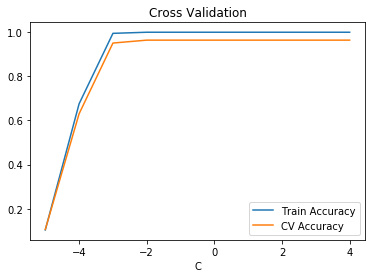

Accuracy of model on testing data is 0.9820224719101124
F1 Score of model on testing data is 0.9820621527120746
Log loss of model on testing data is 0.06571048875493374


In [207]:
vectorizer = CountVectorizer(ngram_range = (1, 2))
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])

model = SVC(decision_function_shape='ovo', kernel='linear')
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = {'C' : alpha}
best_params = tuning(model, alphas, 'C', train_vec, y_train, alpha)

best_alpha = best_params['C']
clf = SVC(decision_function_shape='ovo', kernel='linear',C = best_alpha,probability=True).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


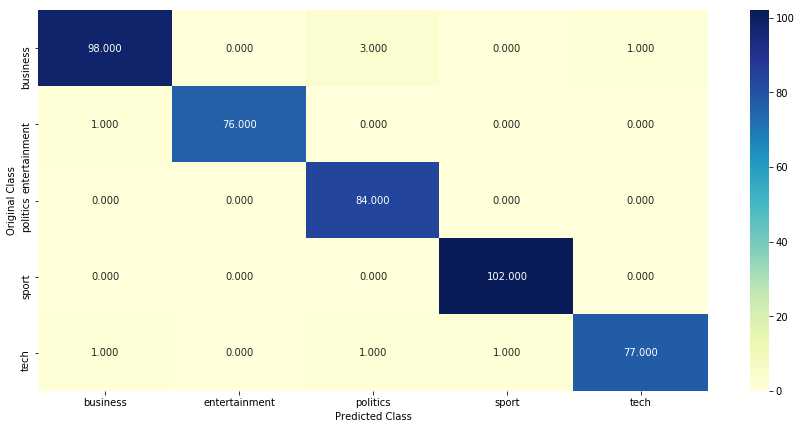

In [208]:
plot_confusion_matrix(y_test, y_pred)

### SVM using TFIDF(uni gram)

For {'C': 1e-05}  acc of Train data is 0.1346972069841523 and acc of CV data is 0.13444324479593558
For {'C': 0.0001}  acc of Train data is 0.1346972069841523 and acc of CV data is 0.13444324479593558
For {'C': 0.001}  acc of Train data is 0.1346972069841523 and acc of CV data is 0.13444324479593558
For {'C': 0.01}  acc of Train data is 0.1346972069841523 and acc of CV data is 0.13444324479593558
For {'C': 0.1}  acc of Train data is 0.8956986364493863 and acc of CV data is 0.8328794247030396
For {'C': 1}  acc of Train data is 0.999454825115015 and acc of CV data is 0.9731876453694566
For {'C': 10}  acc of Train data is 1.0 and acc of CV data is 0.972016242755622
For {'C': 100}  acc of Train data is 1.0 and acc of CV data is 0.972016242755622
For {'C': 1000}  acc of Train data is 1.0 and acc of CV data is 0.972016242755622
For {'C': 10000}  acc of Train data is 1.0 and acc of CV data is 0.972016242755622
Best Parameter is  {'C': 1}
Best F1 Score is  0.9731876453694566


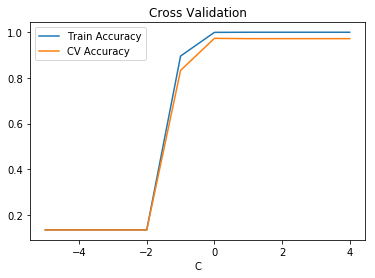

Accuracy of model on testing data is 0.9797752808988764
F1 Score of model on testing data is 0.9797032281688407
Log loss of model on testing data is 0.05979959973717065


In [209]:
vectorizer = TfidfVectorizer()
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])

model = SVC(decision_function_shape='ovo', kernel='linear')
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = {'C' : alpha}
best_params = tuning(model, alphas, 'C', train_vec, y_train, alpha)

best_alpha = best_params['C']
clf = SVC(decision_function_shape='ovo', kernel='linear',C = best_alpha,probability=True).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


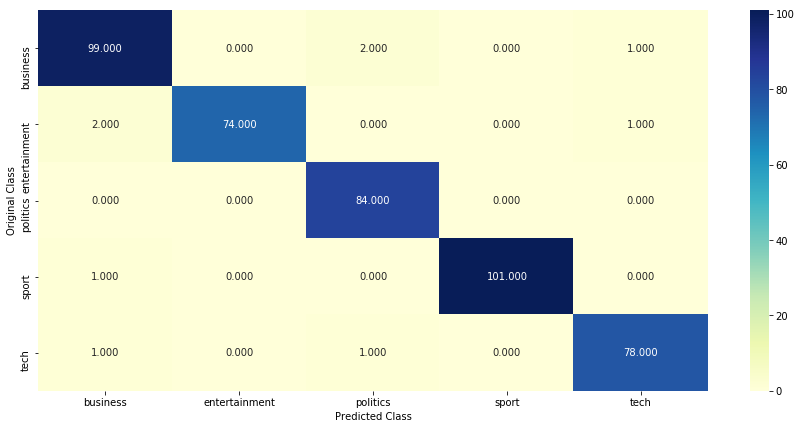

In [210]:
plot_confusion_matrix(y_test, y_pred)

### SVM using TFIDF(Bi gram)

For {'C': 1e-05}  acc of Train data is 0.13480689335183976 and acc of CV data is 0.1345518197330216
For {'C': 0.0001}  acc of Train data is 0.13480689335183976 and acc of CV data is 0.1345518197330216
For {'C': 0.001}  acc of Train data is 0.13480689335183976 and acc of CV data is 0.1345518197330216
For {'C': 0.01}  acc of Train data is 0.13480689335183976 and acc of CV data is 0.1345518197330216
For {'C': 0.1}  acc of Train data is 0.41764311903351664 and acc of CV data is 0.3350522453612074
For {'C': 1}  acc of Train data is 1.0 and acc of CV data is 0.9716181644391577
For {'C': 10}  acc of Train data is 1.0 and acc of CV data is 0.9716181644391577
For {'C': 100}  acc of Train data is 1.0 and acc of CV data is 0.9716181644391577
For {'C': 1000}  acc of Train data is 1.0 and acc of CV data is 0.9716181644391577
For {'C': 10000}  acc of Train data is 1.0 and acc of CV data is 0.9716181644391577
Best Parameter is  {'C': 1}
Best F1 Score is  0.9716181644391577


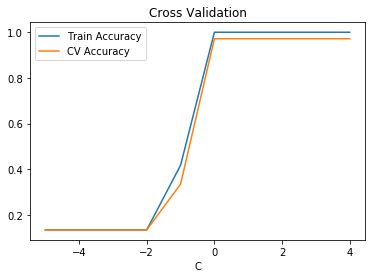

Accuracy of model on testing data is 0.9820224719101124
F1 Score of model on testing data is 0.9819234354458131
Log loss of model on testing data is 0.055894068368695204


In [211]:
vectorizer = TfidfVectorizer(ngram_range = (1, 2))
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])

model = SVC(decision_function_shape='ovo', kernel='linear')
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = {'C' : alpha}
best_params = tuning(model, alphas, 'C', train_vec, y_train, alpha)

best_alpha = best_params['C']
clf = SVC(decision_function_shape='ovo', kernel='linear',C = best_alpha,probability=True).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


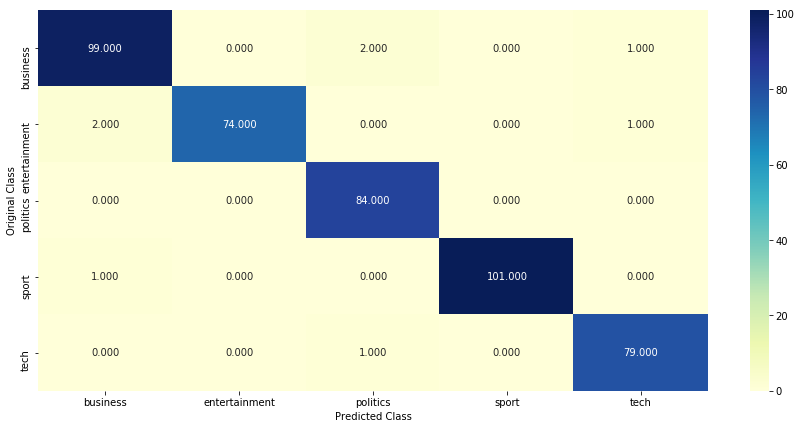

In [212]:
plot_confusion_matrix(y_test, y_pred)

In [139]:
def tuning2(model, parameters, parameter_name, train_data_x, train_data_y, plot_values):
    grid = GridSearchCV(model, parameters, cv = 3, scoring = 'f1_macro')
    grid.fit(train_data_x, train_data_y)
    
    
    results = pd.DataFrame(grid.cv_results_)           #storing results of gridseachcv in a dataframe to access its elements
    params = results['params']                         #storing combination of parameters used by model in params
    score_tr_array = results['mean_train_score']         #storing scores on train data of model
    score_cv_array = results['mean_test_score']          #storing scores on cv data of model
    for i in range(len(params)):
        print("For", params[i]," acc of Train data is", score_tr_array[i],"and acc of CV data is", score_cv_array[i])
    
    
    print('Best Parameter is ',  grid.best_params_)
    print('Best F1 Score is ',  grid.best_score_)
    plt.xlabel(parameter_name)
    plt.title('Cross Validation')
    plt.plot((plot_values),grid.cv_results_['mean_train_score'])
    plt.plot((plot_values),grid.cv_results_['mean_test_score'])
    plt.legend(['Train Accuracy', 'CV Accuracy'])
    plt.show()
    
    return grid.best_params_

## K-Nearest Neighbours

### KNN using BOW(uni gram)

For {'n_neighbors': 3}  acc of Train data is 0.8726174649299673 and acc of CV data is 0.6776229259185752
For {'n_neighbors': 5}  acc of Train data is 0.7756981343878907 and acc of CV data is 0.6288538376417525
For {'n_neighbors': 7}  acc of Train data is 0.6893922506461725 and acc of CV data is 0.5892957452873953
For {'n_neighbors': 9}  acc of Train data is 0.63160122952395 and acc of CV data is 0.5562177855937535
For {'n_neighbors': 11}  acc of Train data is 0.5882905459724201 and acc of CV data is 0.5244479734221427
For {'n_neighbors': 13}  acc of Train data is 0.5511848503462703 and acc of CV data is 0.49455523075168806
For {'n_neighbors': 15}  acc of Train data is 0.5208325779866807 and acc of CV data is 0.4700032276489348
For {'n_neighbors': 17}  acc of Train data is 0.49261192169384066 and acc of CV data is 0.4497755489921173
For {'n_neighbors': 19}  acc of Train data is 0.4712400258107552 and acc of CV data is 0.42667057951114606
For {'n_neighbors': 21}  acc of Train data is 0.4

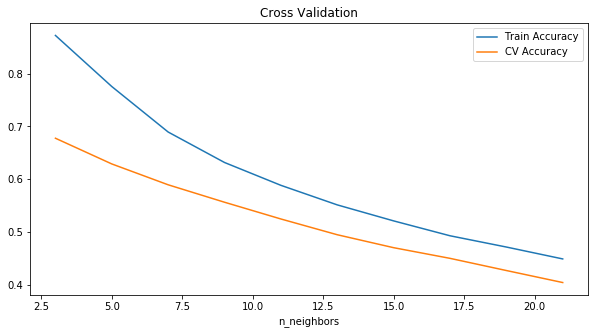

Accuracy of model on testing data is 0.755056179775281
F1 Score of model on testing data is 0.7444962737156484
Log loss of model on testing data is 4.954201635003232


In [140]:
from sklearn.neighbors import KNeighborsClassifier

vectorizer = CountVectorizer()
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])

model = KNeighborsClassifier()
alpha = [3,5,7,9,11,13,15,17,19,21]
alphas = {'n_neighbors' : alpha}
best_params = tuning2(model, alphas, 'n_neighbors', train_vec, y_train, alpha)

best_alpha = best_params['n_neighbors']
clf = KNeighborsClassifier(n_neighbors=best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


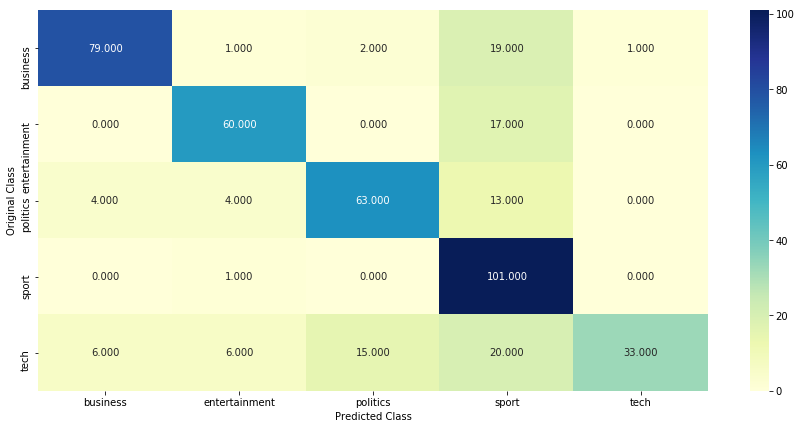

In [141]:
plot_confusion_matrix(y_test, y_pred)

### KNN using BOW(Bi gram)

For {'n_neighbors': 3}  acc of Train data is 0.8286030518465711 and acc of CV data is 0.5503393875993047
For {'n_neighbors': 5}  acc of Train data is 0.6173677264137655 and acc of CV data is 0.4666821331064451
For {'n_neighbors': 7}  acc of Train data is 0.5143580076160731 and acc of CV data is 0.4140720613589709
For {'n_neighbors': 9}  acc of Train data is 0.4375355652688002 and acc of CV data is 0.37351974137275123
For {'n_neighbors': 11}  acc of Train data is 0.39157596943309364 and acc of CV data is 0.33660819974547
For {'n_neighbors': 13}  acc of Train data is 0.3487463256332452 and acc of CV data is 0.3075436944706821
For {'n_neighbors': 15}  acc of Train data is 0.319052538727912 and acc of CV data is 0.2844821442274496
For {'n_neighbors': 17}  acc of Train data is 0.2943978819269916 and acc of CV data is 0.2656021040740856
For {'n_neighbors': 19}  acc of Train data is 0.2629644533685044 and acc of CV data is 0.24595754352618107
For {'n_neighbors': 21}  acc of Train data is 0.23

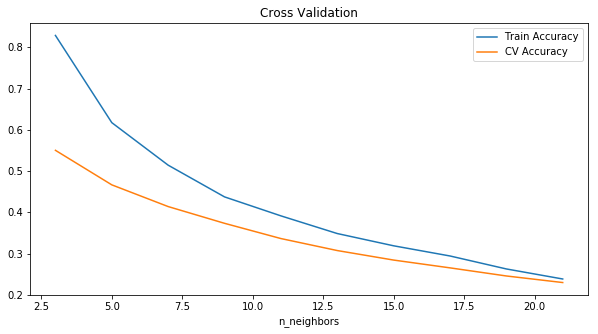

Accuracy of model on testing data is 0.6089887640449438
F1 Score of model on testing data is 0.5909296104016251
Log loss of model on testing data is 9.26362900919375


In [142]:
from sklearn.neighbors import KNeighborsClassifier

vectorizer = CountVectorizer(ngram_range = (1, 2))
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])

model = KNeighborsClassifier()
alpha = [3,5,7,9,11,13,15,17,19,21]
alphas = {'n_neighbors' : alpha}
best_params = tuning2(model, alphas, 'n_neighbors', train_vec, y_train, alpha)

best_alpha = best_params['n_neighbors']
clf = KNeighborsClassifier(n_neighbors=best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


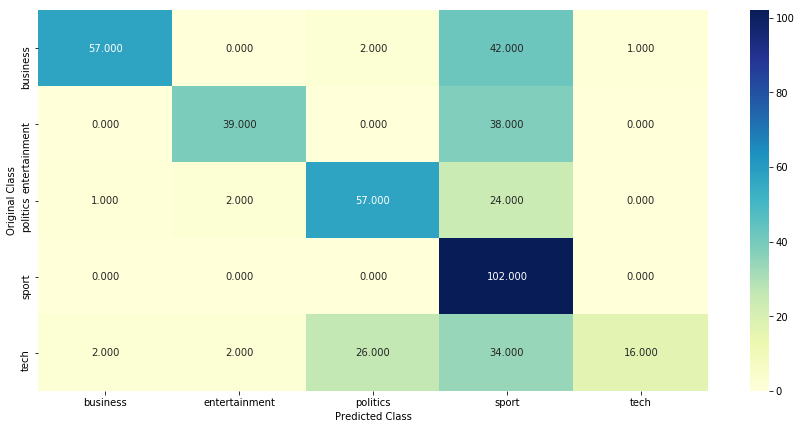

In [143]:
plot_confusion_matrix(y_test, y_pred)

### KNN using TFIDF(uni gram)

For {'n_neighbors': 3}  acc of Train data is 0.9648141303548811 and acc of CV data is 0.915114783729627
For {'n_neighbors': 5}  acc of Train data is 0.9556130143635384 and acc of CV data is 0.9287965933917801
For {'n_neighbors': 7}  acc of Train data is 0.9552169399187239 and acc of CV data is 0.9341608422139062
For {'n_neighbors': 9}  acc of Train data is 0.9547000082165494 and acc of CV data is 0.9344115681211639
For {'n_neighbors': 11}  acc of Train data is 0.9511574566818854 and acc of CV data is 0.9323326157795466
For {'n_neighbors': 13}  acc of Train data is 0.9489303667216555 and acc of CV data is 0.9341163310273888
For {'n_neighbors': 15}  acc of Train data is 0.9545648228411395 and acc of CV data is 0.9359852878784762
For {'n_neighbors': 17}  acc of Train data is 0.9517827920780354 and acc of CV data is 0.9363939859879513
For {'n_neighbors': 19}  acc of Train data is 0.9523171333545868 and acc of CV data is 0.9396785462543181
For {'n_neighbors': 21}  acc of Train data is 0.952

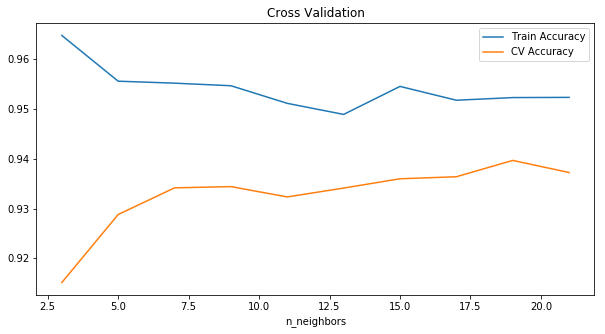

Accuracy of model on testing data is 0.950561797752809
F1 Score of model on testing data is 0.9503298156286941
Log loss of model on testing data is 0.2030566016129198


In [144]:
from sklearn.neighbors import KNeighborsClassifier

vectorizer = TfidfVectorizer()
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])

model = KNeighborsClassifier()
alpha = [3,5,7,9,11,13,15,17,19,21]
alphas = {'n_neighbors' : alpha}
best_params = tuning2(model, alphas, 'n_neighbors', train_vec, y_train, alpha)

best_alpha = best_params['n_neighbors']
clf = KNeighborsClassifier(n_neighbors=best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


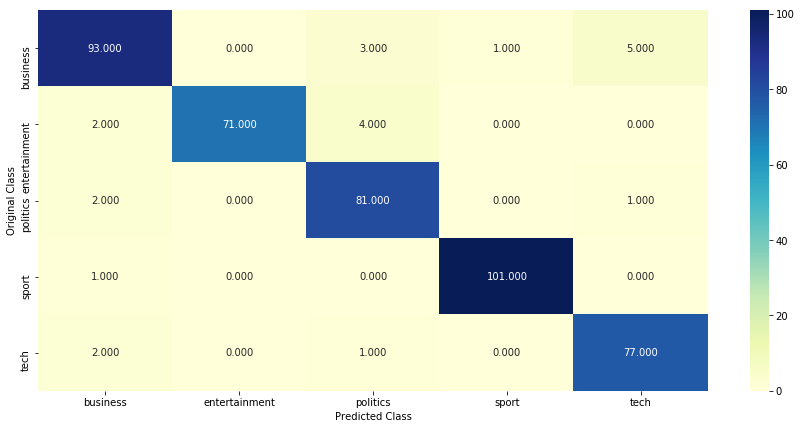

In [145]:
plot_confusion_matrix(y_test, y_pred)

### KNN using TFIDF(Bi gram)

For {'n_neighbors': 3}  acc of Train data is 0.9671763419964128 and acc of CV data is 0.9243358360058207
For {'n_neighbors': 5}  acc of Train data is 0.9619026927089637 and acc of CV data is 0.9337081800618423
For {'n_neighbors': 7}  acc of Train data is 0.9602544627927062 and acc of CV data is 0.9383821469690373
For {'n_neighbors': 9}  acc of Train data is 0.9592466476139574 and acc of CV data is 0.942283597048814
For {'n_neighbors': 11}  acc of Train data is 0.9566850952579499 and acc of CV data is 0.9455535385758645
For {'n_neighbors': 13}  acc of Train data is 0.9558728789547204 and acc of CV data is 0.9427058386498619
For {'n_neighbors': 15}  acc of Train data is 0.9562287451570278 and acc of CV data is 0.9454976179046006
For {'n_neighbors': 17}  acc of Train data is 0.9558953752021807 and acc of CV data is 0.9436717165115162
For {'n_neighbors': 19}  acc of Train data is 0.9560980406307661 and acc of CV data is 0.94297141914555
For {'n_neighbors': 21}  acc of Train data is 0.95612

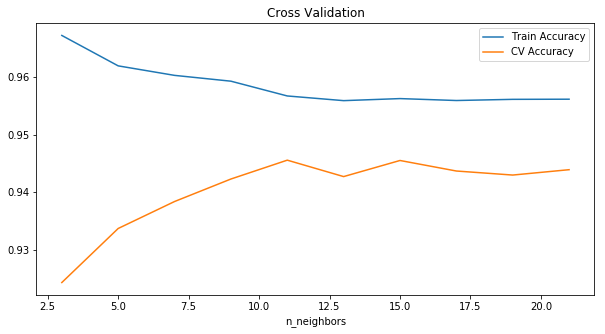

Accuracy of model on testing data is 0.9595505617977528
F1 Score of model on testing data is 0.9592445963615234
Log loss of model on testing data is 0.23710791367498196


In [146]:
from sklearn.neighbors import KNeighborsClassifier

vectorizer = TfidfVectorizer(ngram_range = (1, 2))
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])

model = KNeighborsClassifier()
alpha = [3,5,7,9,11,13,15,17,19,21]
alphas = {'n_neighbors' : alpha}
best_params = tuning2(model, alphas, 'n_neighbors', train_vec, y_train, alpha)

best_alpha = best_params['n_neighbors']
clf = KNeighborsClassifier(n_neighbors=best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


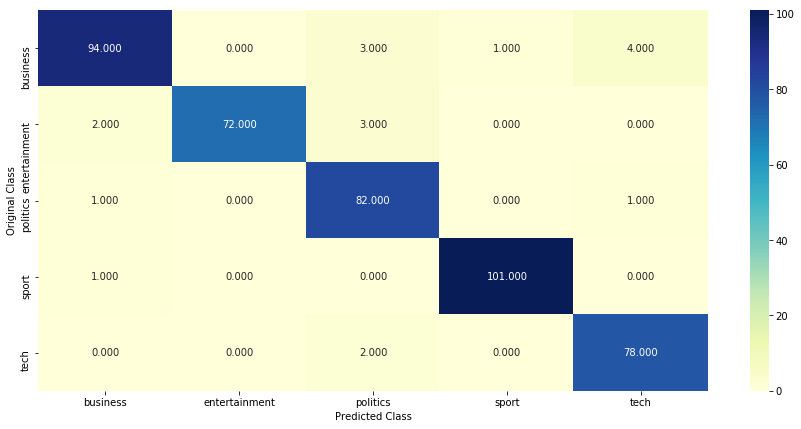

In [147]:
plot_confusion_matrix(y_test, y_pred)

### Random Forest

### RF using BOW(uni gram)

For {'n_estimators': 100}  acc of Train data is 1.0 and acc of CV data is 0.9565918282728323
For {'n_estimators': 150}  acc of Train data is 1.0 and acc of CV data is 0.9643459559124969
For {'n_estimators': 200}  acc of Train data is 1.0 and acc of CV data is 0.9596082405104944
For {'n_estimators': 250}  acc of Train data is 1.0 and acc of CV data is 0.9602242664567883
For {'n_estimators': 300}  acc of Train data is 1.0 and acc of CV data is 0.9626720382452103
Best Parameter is  {'n_estimators': 150}
Best F1 Score is  0.9643459559124969


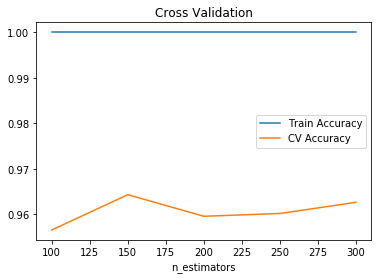

Accuracy of model on testing data is 0.9752808988764045
F1 Score of model on testing data is 0.9747398023457073
Log loss of model on testing data is 0.38637642411698686


In [213]:
from sklearn.ensemble import RandomForestClassifier

vectorizer = CountVectorizer()
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])

model=RandomForestClassifier()
alpha = [100,150,200,250,300]
alphas = {'n_estimators' : alpha}
best_params = tuning2(model, alphas, 'n_estimators', train_vec, y_train, alpha)

best_alpha = best_params['n_estimators']
clf = RandomForestClassifier(n_estimators=best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

For {'max_depth': 2}  acc of Train data is 0.7256788192689854 and acc of CV data is 0.6980257049055268
For {'max_depth': 4}  acc of Train data is 0.9076107946526589 and acc of CV data is 0.8750068672346089
For {'max_depth': 6}  acc of Train data is 0.9543059343495134 and acc of CV data is 0.9087925692233936
For {'max_depth': 8}  acc of Train data is 0.9779120410565735 and acc of CV data is 0.9354636030695817
For {'max_depth': 10}  acc of Train data is 0.9918920873848728 and acc of CV data is 0.9405092526314526
For {'max_depth': 12}  acc of Train data is 0.9957969112371551 and acc of CV data is 0.9459080078297543
For {'max_depth': 14}  acc of Train data is 0.9975220883550979 and acc of CV data is 0.9559223019778983
For {'max_depth': 16}  acc of Train data is 0.9989035553250055 and acc of CV data is 0.9569984233227303
Best Parameter is  {'max_depth': 16}
Best F1 Score is  0.9569984233227303


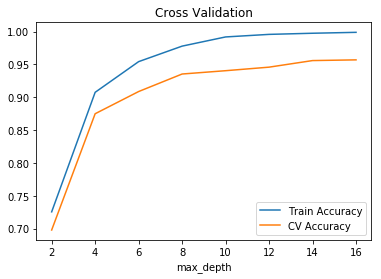

Accuracy of model on testing data is 0.9730337078651685
F1 Score of model on testing data is 0.9724523495164588
Log loss of model on testing data is 0.622551699221762


In [214]:
model=RandomForestClassifier(n_estimators=200)
alpha = [2,4,6,8,10,12,14,16]
alphas = {'max_depth' : alpha}
best_params = tuning2(model, alphas, 'max_depth', train_vec, y_train, alpha)

best_alpha = best_params['max_depth']
clf = RandomForestClassifier(n_estimators=200,max_depth=best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


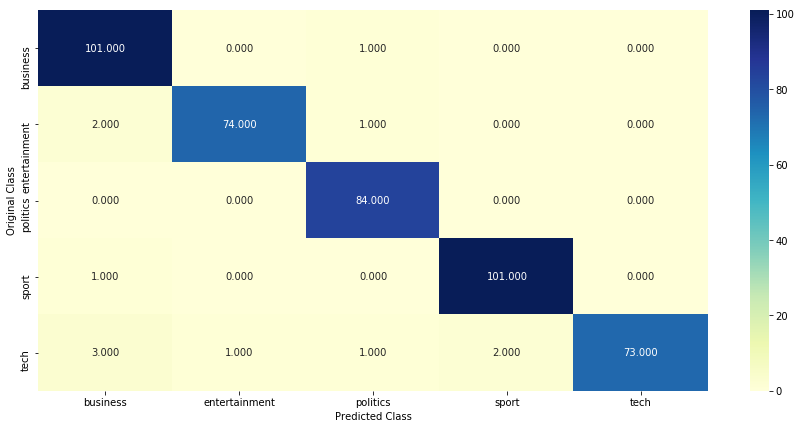

In [215]:
plot_confusion_matrix(y_test, y_pred)

### RF using BOW(Bi gram)

For {'n_estimators': 100}  acc of Train data is 1.0 and acc of CV data is 0.9452929828249401
For {'n_estimators': 150}  acc of Train data is 1.0 and acc of CV data is 0.9479928005109808
For {'n_estimators': 200}  acc of Train data is 1.0 and acc of CV data is 0.9456762344605387
For {'n_estimators': 250}  acc of Train data is 1.0 and acc of CV data is 0.9513575505411256
For {'n_estimators': 300}  acc of Train data is 1.0 and acc of CV data is 0.9501133192063907
Best Parameter is  {'n_estimators': 250}
Best F1 Score is  0.9513575505411256


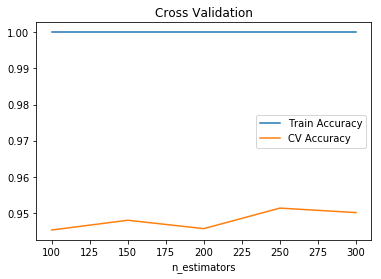

Accuracy of model on testing data is 0.9640449438202248
F1 Score of model on testing data is 0.9635214731619227
Log loss of model on testing data is 0.45457847899669573


In [216]:
from sklearn.ensemble import RandomForestClassifier

vectorizer = CountVectorizer(ngram_range = (1, 2))
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])

model=RandomForestClassifier()
alpha = [100,150,200,250,300]
alphas = {'n_estimators' : alpha}
best_params = tuning2(model, alphas, 'n_estimators', train_vec, y_train, alpha)

best_alpha = best_params['n_estimators']
clf = RandomForestClassifier(n_estimators=best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

For {'max_depth': 2}  acc of Train data is 0.5665793177091699 and acc of CV data is 0.534557231620577
For {'max_depth': 4}  acc of Train data is 0.7965498768634091 and acc of CV data is 0.746797117349276
For {'max_depth': 6}  acc of Train data is 0.8958654162683786 and acc of CV data is 0.8260996756851678
For {'max_depth': 8}  acc of Train data is 0.9514175129603893 and acc of CV data is 0.8792812039792874
For {'max_depth': 10}  acc of Train data is 0.9759489463587808 and acc of CV data is 0.9086392688654175
For {'max_depth': 12}  acc of Train data is 0.9891625003043694 and acc of CV data is 0.9230247883514422
For {'max_depth': 14}  acc of Train data is 0.9938948372106525 and acc of CV data is 0.9310309000815113
For {'max_depth': 16}  acc of Train data is 0.9972377115616894 and acc of CV data is 0.9398136566142343
Best Parameter is  {'max_depth': 16}
Best F1 Score is  0.9398136566142343


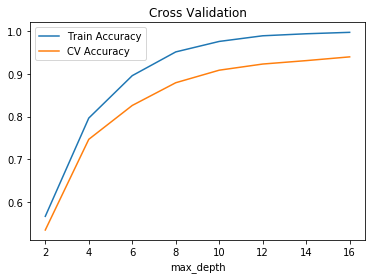

Accuracy of model on testing data is 0.9595505617977528
F1 Score of model on testing data is 0.9597425558626161
Log loss of model on testing data is 0.8788948657744398


In [217]:
model=RandomForestClassifier(n_estimators=best_alpha)
alpha = [2,4,6,8,10,12,14,16]
alphas = {'max_depth' : alpha}
best_params = tuning2(model, alphas, 'max_depth', train_vec, y_train, alpha)

best_alpha = best_params['max_depth']
clf = RandomForestClassifier(n_estimators=300,max_depth=best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


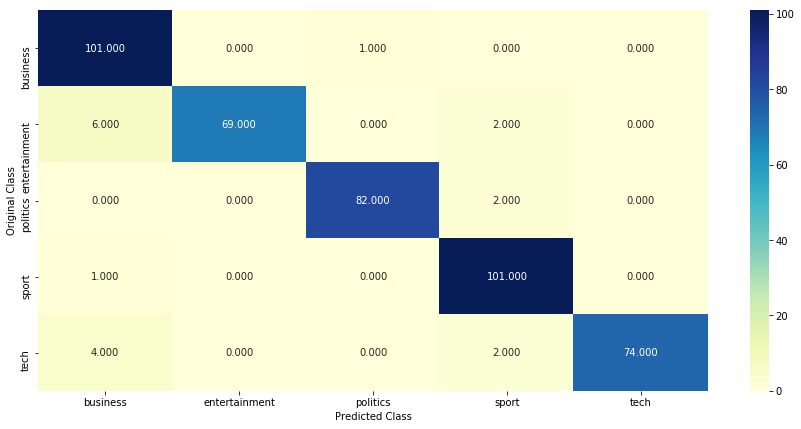

In [218]:
plot_confusion_matrix(y_test, y_pred)

### RF using TFIDF(uni gram)

For {'n_estimators': 100}  acc of Train data is 1.0 and acc of CV data is 0.9582102491912333
For {'n_estimators': 150}  acc of Train data is 1.0 and acc of CV data is 0.9604335274686179
For {'n_estimators': 200}  acc of Train data is 1.0 and acc of CV data is 0.9636768119276556
For {'n_estimators': 250}  acc of Train data is 1.0 and acc of CV data is 0.9608866336944482
For {'n_estimators': 300}  acc of Train data is 1.0 and acc of CV data is 0.9601689174437369
Best Parameter is  {'n_estimators': 200}
Best F1 Score is  0.9636768119276556


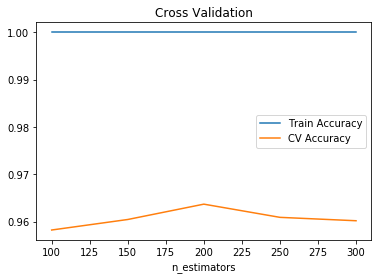

Accuracy of model on testing data is 0.9730337078651685
F1 Score of model on testing data is 0.9727048626944909
Log loss of model on testing data is 0.4015405734629759


In [219]:
from sklearn.ensemble import RandomForestClassifier

vectorizer = TfidfVectorizer()
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])

model=RandomForestClassifier()
alpha = [100,150,200,250,300]
alphas = {'n_estimators' : alpha}
best_params = tuning2(model, alphas, 'n_estimators', train_vec, y_train, alpha)

best_alpha = best_params['n_estimators']
clf = RandomForestClassifier(n_estimators=best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

For {'max_depth': 2}  acc of Train data is 0.75310532453897 and acc of CV data is 0.7101327892279298
For {'max_depth': 4}  acc of Train data is 0.9114059502958832 and acc of CV data is 0.8747299304939544
For {'max_depth': 6}  acc of Train data is 0.9664750545229134 and acc of CV data is 0.9220611654768903
For {'max_depth': 8}  acc of Train data is 0.9863038944826794 and acc of CV data is 0.9368071538337307
For {'max_depth': 10}  acc of Train data is 0.993916669423205 and acc of CV data is 0.9478583855128385
For {'max_depth': 12}  acc of Train data is 0.9963911976455392 and acc of CV data is 0.9491888745386917
For {'max_depth': 14}  acc of Train data is 0.9983464254790828 and acc of CV data is 0.9570347286954445
For {'max_depth': 16}  acc of Train data is 0.9994543735028752 and acc of CV data is 0.9539628976502879
Best Parameter is  {'max_depth': 14}
Best F1 Score is  0.9570347286954445


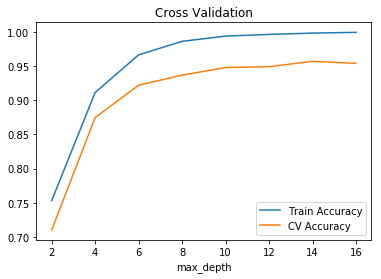

Accuracy of model on testing data is 0.9573033707865168
F1 Score of model on testing data is 0.9562517956430104
Log loss of model on testing data is 0.6951239486776011


In [220]:
model=RandomForestClassifier(n_estimators=best_alpha)
alpha = [2,4,6,8,10,12,14,16]
alphas = {'max_depth' : alpha}
best_params = tuning2(model, alphas, 'max_depth', train_vec, y_train, alpha)

best_alpha = best_params['max_depth']
clf = RandomForestClassifier(n_estimators=200,max_depth=best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


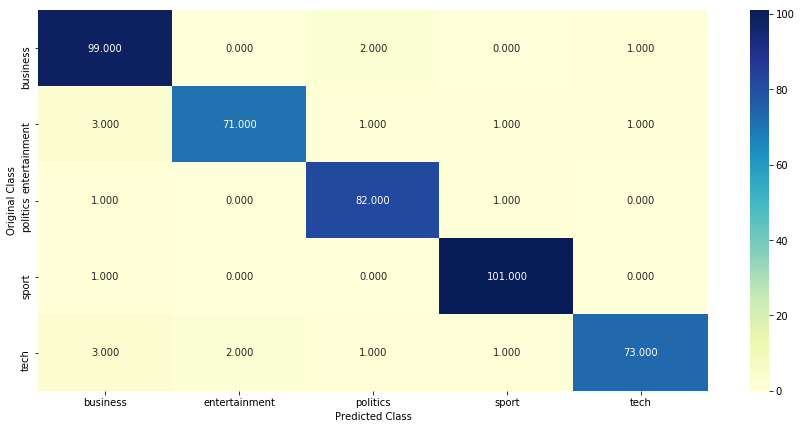

In [221]:
plot_confusion_matrix(y_test, y_pred)

### RF using TFIDF(Bi gram)

For {'n_estimators': 100}  acc of Train data is 1.0 and acc of CV data is 0.9507545345183682
For {'n_estimators': 150}  acc of Train data is 1.0 and acc of CV data is 0.9560075960994658
For {'n_estimators': 200}  acc of Train data is 1.0 and acc of CV data is 0.9569980523805873
For {'n_estimators': 250}  acc of Train data is 1.0 and acc of CV data is 0.9539052165861817
For {'n_estimators': 300}  acc of Train data is 1.0 and acc of CV data is 0.9570193619434729
Best Parameter is  {'n_estimators': 300}
Best F1 Score is  0.9570193619434729


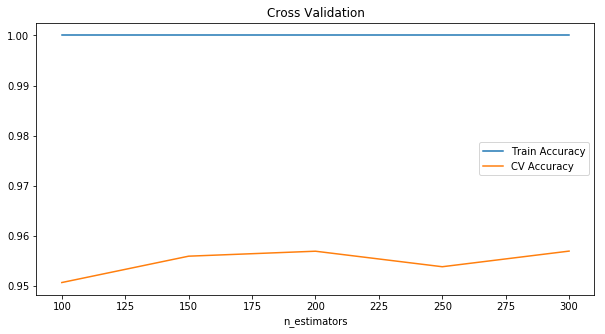

Accuracy of model on testing data is 0.9685393258426966
F1 Score of model on testing data is 0.9682090654258027
Log loss of model on testing data is 0.4874251490848218


In [161]:
from sklearn.ensemble import RandomForestClassifier

vectorizer = TfidfVectorizer(ngram_range = (1, 2))
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])

model=RandomForestClassifier()
alpha = [100,150,200,250,300]
alphas = {'n_estimators' : alpha}
best_params = tuning2(model, alphas, 'n_estimators', train_vec, y_train, alpha)

best_alpha = best_params['n_estimators']
clf = RandomForestClassifier(n_estimators=best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

For {'max_depth': 2}  acc of Train data is 0.572897544779996 and acc of CV data is 0.5326609583661986
For {'max_depth': 4}  acc of Train data is 0.8325811140217599 and acc of CV data is 0.7656253652066377
For {'max_depth': 6}  acc of Train data is 0.9226452492898032 and acc of CV data is 0.8470489840992588
For {'max_depth': 8}  acc of Train data is 0.9615790193137279 and acc of CV data is 0.8939660313277853
For {'max_depth': 10}  acc of Train data is 0.9847097569713871 and acc of CV data is 0.9156997108333668
For {'max_depth': 12}  acc of Train data is 0.9925031874750957 and acc of CV data is 0.9263425163279542
For {'max_depth': 14}  acc of Train data is 0.9978140258211669 and acc of CV data is 0.9346951772580918
For {'max_depth': 16}  acc of Train data is 0.9986347816151193 and acc of CV data is 0.9416557441123329
Best Parameter is  {'max_depth': 16}
Best F1 Score is  0.9416557441123329


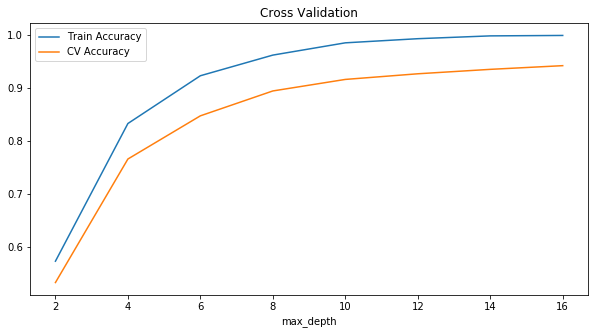

Accuracy of model on testing data is 0.9573033707865168
F1 Score of model on testing data is 0.9567304326957233
Log loss of model on testing data is 0.8911319964058759


In [163]:
model=RandomForestClassifier(n_estimators=best_alpha)
alpha = [2,4,6,8,10,12,14,16]
alphas = {'max_depth' : alpha}
best_params = tuning2(model, alphas, 'max_depth', train_vec, y_train, alpha)

best_alpha = best_params['max_depth']
clf = RandomForestClassifier(n_estimators=300,max_depth=best_alpha).fit(train_vec, y_train)
y_pred = clf.predict(test_vec)
y_pred_proba = clf.predict_proba(test_vec)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


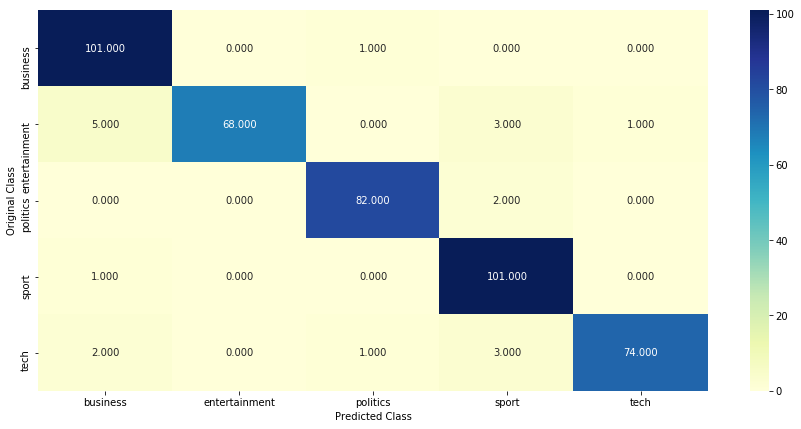

In [164]:
plot_confusion_matrix(y_test, y_pred)

## K-Means Clustering

### K-Means Clustering using TFIDF

In [165]:
from sklearn.cluster import KMeans

In [169]:
vectorizer = CountVectorizer(ngram_range = (1, 2))
vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])
loss=[]
for i in range(3,15,1):
    print('cluster size--',i)
    kmeans=KMeans(n_clusters=i,random_state=0).fit(vec)
    loss.append(kmeans.inertia_)

cluster size-- 3
cluster size-- 4
cluster size-- 5
cluster size-- 6
cluster size-- 7
cluster size-- 8
cluster size-- 9
cluster size-- 10
cluster size-- 11
cluster size-- 12
cluster size-- 13
cluster size-- 14


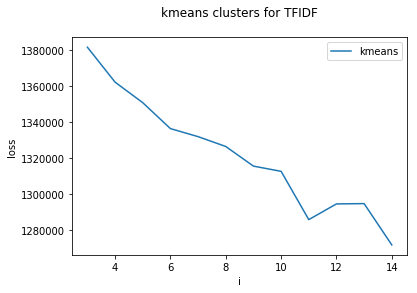

In [170]:
i=range(3,15,1)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(i,loss,label='kmeans')
plt.title('kmeans clusters for TFIDF\n')
plt.xlabel('i')
plt.ylabel('loss')
plt.legend()
plt.show()

In [171]:
kmeans_Bow=KMeans(n_clusters=6,random_state=0).fit(vec)

In [197]:
#function to display cluster grouping for each cluster set
from wordcloud import WordCloud
def cluster_results(n,kmeans):
    mydict={i : np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
    lists1=list(mydict[n])
    s=x_train['cleaned_with_lemma'].iloc[lists1] 
    wordcloud1=WordCloud().generate(''.join(s))
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud1)
    plt.axis("off")
    plt.show()

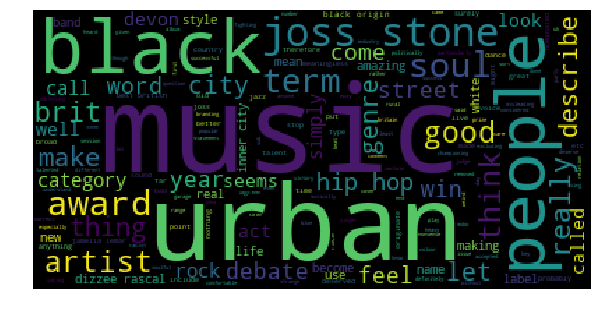

In [198]:
cluster_results(0,kmeans_Bow)

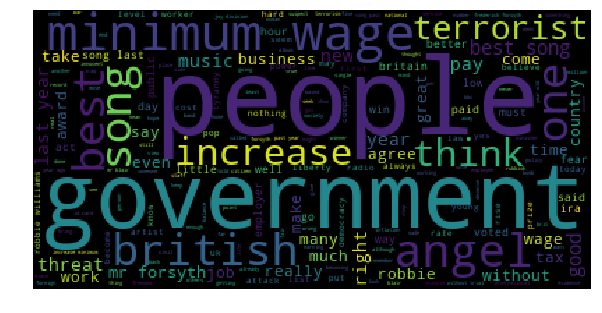

In [199]:
cluster_results(1,kmeans_Bow)

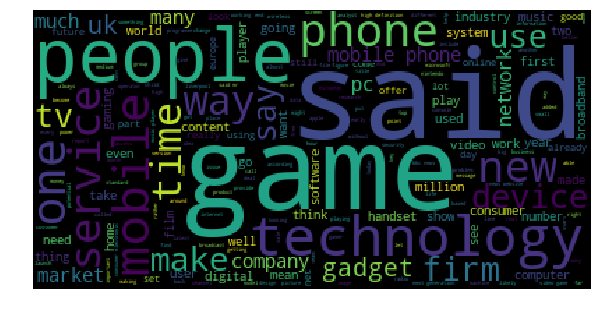

In [200]:
cluster_results(2,kmeans_Bow)

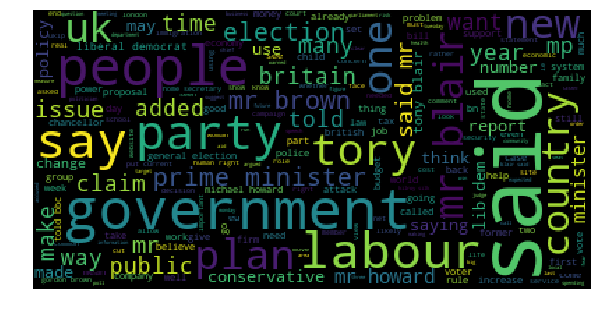

In [201]:
cluster_results(3,kmeans_Bow)

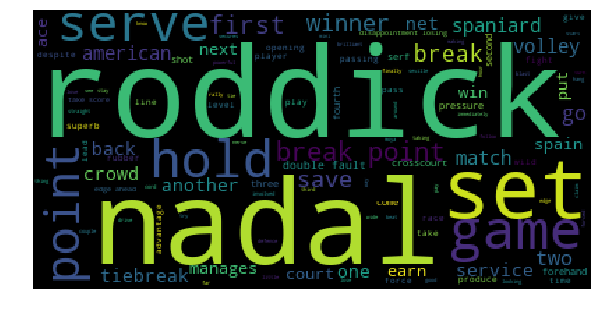

In [202]:
cluster_results(4,kmeans_Bow)

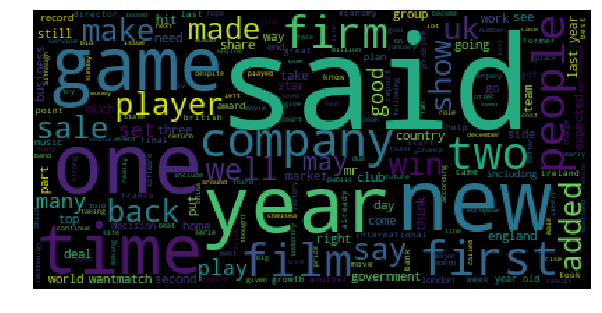

In [203]:
cluster_results(5,kmeans_Bow)

In [3]:
print(15/2)

7.5
